In [1]:
from scipy.stats import norm
from scipy.stats import t
import scipy.integrate as integrate
import numpy as np
import pandas as pd
from numpy.random import seed
import matplotlib.pyplot as plt

__Q:__ Call up the documentation for the `norm` function imported above. What is the second listed method?

In [2]:
norm?

__A:__ The second listed method is the pdf function

__Q:__ Use the method that generates random variates to draw five samples from the standard normal distribution.

__A:__

In [7]:
seed(47)
# draw five samples here
values = norm.rvs(size=5)

__Q:__ What is the mean of this sample? Is it exactly equal to the value you expected? Hint: the sample was drawn from the standard normal distribution.

__A:__ The mean of this sample is .19355 which is close to the expected mean which would be 0

In [8]:
# Calculate and print the mean here, hint: use np.mean()
mu = np.mean(values)
print(mu)

0.19355593334131074


__Q:__ What is the standard deviation of these numbers? Calculate this manually here as $\sqrt{\frac{\sum_i(x_i - \bar{x})^2}{n}}$. Hint: np.sqrt() and np.sum() will be useful here and remember that numpy supports [broadcasting](https://docs.scipy.org/doc/numpy/user/basics.broadcasting.html).

__A:__

In [9]:
np.sqrt(np.sum((values - mu)**2)/len(values))

0.9606195639478641

__Q:__ If all we had to go on was our five samples, what would be our best estimate of the population standard deviation? Use Bessel's correction ($n-1$ in the denominator), thus $\sqrt{\frac{\sum_i(x_i - \bar{x})^2}{n-1}}$.

__A:__

In [11]:
np.sqrt(np.sum((values - mu)**2)/(len(values)-1))

1.0740053227518152

__Q:__ Now use numpy's std function to calculate the standard deviation of our random samples. Which of the above standard deviations did it return?

__A:__

In [12]:
np.std(values)

0.9606195639478641

__Q:__ Consult the documentation for np.std() to see how to apply the correction for estimating the population parameter and verify this produces the expected result.

__A:__

In [13]:
np.std?

In [14]:
np.std(values, ddof=1)

1.0740053227518152

In [15]:
seed(47)
pop_heights = norm.rvs(172, 5, size=50000)

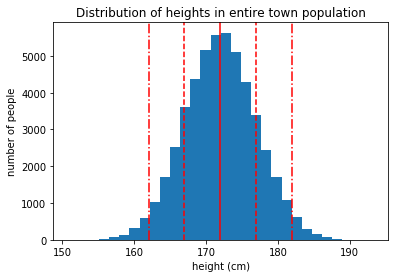

In [16]:
_ = plt.hist(pop_heights, bins=30)
_ = plt.xlabel('height (cm)')
_ = plt.ylabel('number of people')
_ = plt.title('Distribution of heights in entire town population')
_ = plt.axvline(172, color='r')
_ = plt.axvline(172+5, color='r', linestyle='--')
_ = plt.axvline(172-5, color='r', linestyle='--')
_ = plt.axvline(172+10, color='r', linestyle='-.')
_ = plt.axvline(172-10, color='r', linestyle='-.')

In [17]:
def townsfolk_sampler(n):
    return np.random.choice(pop_heights, n)

In [18]:
seed(47)
daily_sample1 = townsfolk_sampler(10)

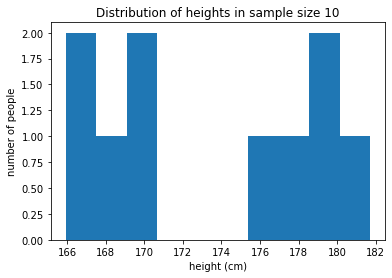

In [19]:
_ = plt.hist(daily_sample1, bins=10)
_ = plt.xlabel('height (cm)')
_ = plt.ylabel('number of people')
_ = plt.title('Distribution of heights in sample size 10')

In [20]:
actual_mean = 172
actual_std = 5

In [21]:
np.mean(daily_sample1)

173.47911444163503

In [22]:
daily_sample2 = townsfolk_sampler(10)

In [23]:
np.mean(daily_sample2)

173.7317666636263

__Q:__ Simulate performing this random trial every day for a year, calculating the mean of each daily sample of 10, and plot the resultant sampling distribution of the mean.

In [24]:
[np.mean(townsfolk_sampler(10)) for _ in range(365)]

[172.54893867276104,
 171.43257319553967,
 172.7151613148319,
 172.82799509412092,
 172.72104620090087,
 171.35684251559897,
 172.06082915612325,
 175.02116165843373,
 172.87297442836729,
 173.10695709894807,
 174.28251319331625,
 172.16799412617846,
 172.2677166306168,
 174.1148759511088,
 173.76989560652873,
 173.53587661697912,
 171.73109636549412,
 173.6192933521118,
 171.4122703231149,
 169.8912622859572,
 171.50855064552047,
 170.79777102526515,
 172.13293591535268,
 174.04237966386012,
 171.41699712312,
 169.68751210980005,
 170.70138979236123,
 170.50288822335273,
 171.1227335807866,
 172.18184913764566,
 172.68945746436543,
 171.0001004904461,
 170.89451146667253,
 171.09020297014567,
 171.25533609966612,
 172.10797845540236,
 171.08827013545948,
 172.6513531230999,
 175.070689805427,
 169.97597644140453,
 172.2797674841427,
 169.68001261485807,
 172.80409332096238,
 172.55229420480956,
 173.83054118621465,
 173.37568836233626,
 171.89359355779794,
 171.6665742212276,
 169.900

In [25]:
seed(47)
# take your samples here
sampling_dist = [townsfolk_sampler(10) for _ in range(365)]
sampling_mean_dist = [np.mean(x) for x in sampling_dist]

__Q:__ Verify the above results from the CLT.

__A:__

In [27]:
sampling_mean = np.mean(sampling_mean_dist)
print(actual_mean, '~=', sampling_mean)

172 ~= 171.8660049358649


In [28]:
std_sampling_mean = np.std(sampling_mean_dist) 
average_std_sampling_mean = np.mean([np.std(x, ddof=1)/np.sqrt(len(x)) for x in sampling_dist])
print(std_sampling_mean, '~=', average_std_sampling_mean)

1.5756704135286475 ~= 1.5324272727660297


__Q:__ Repeat the above year's worth of samples but for a sample size of 50 (perhaps you had a bigger budget for conducting surveys that year!) Would you expect your distribution of sample means to be wider (more variable) or narrower (more consistent)? Compare your resultant summary statistics to those predicted by the CLT.

__A:__

In [29]:
seed(47)
# calculate daily means from the larger sample size here
sampling_dist = [townsfolk_sampler(50) for _ in range(365)]
sampling_mean_dist = [np.mean(x) for x in sampling_dist]

In [30]:
sampling_mean = np.mean(sampling_mean_dist)
print(actual_mean, '~=', sampling_mean)

172 ~= 171.94366080916114


In [31]:
std_sampling_mean = np.std(sampling_mean_dist) 
average_std_sampling_mean = np.mean([np.std(x, ddof=1)/np.sqrt(len(x)) for x in sampling_dist])
print(std_sampling_mean, '~=', average_std_sampling_mean)

0.6736107539771146 ~= 0.703131192056529


__Q:__ Using this fact, calculate the probability of observing the value 1 or less in a single observation from the standard normal distribution. Hint: you may find it helpful to sketch the standard normal distribution (the familiar bell shape) and mark the number of standard deviations from the mean on the x-axis and shade the regions of the curve that contain certain percentages of the population.

__A:__ .8413

__Q:__ Use the cdf() function to answer the question above again and verify you get the same answer.

__A:__

In [34]:
norm.cdf(1)

0.8413447460685429

__Q:__ Using our knowledge of the population parameters for our townsfolk's heights, what is the probability of selecting one person at random and their height being 177 cm or less? Calculate this using both of the approaches given above.

__A:__ .8413

In [36]:
norm.cdf(177, loc=actual_mean, scale=actual_std)

0.8413447460685429

__Q:__ Turning this question around. Let's say we randomly pick one person and measure their height and find they are 2.00 m tall? How surprised should we be at this result, given what we know about the population distribution? In other words, how likely would it be to obtain a value at least as extreme as this? Express this as a probability.

__A:__

In [38]:
p = 1 - norm.cdf(200, loc=actual_mean, scale=actual_std)
p

1.0717590259723409e-08

__Q:__ Let's now start from the position of knowing nothing about the heights of people in our town.
* Use our favorite random seed of 47, to randomly sample the heights of 50 townsfolk
* Estimate the population mean using np.mean
* Estimate the population standard deviation using np.std (remember which denominator to use!)
* Calculate the (95%) [margin of error](https://www.statisticshowto.datasciencecentral.com/probability-and-statistics/hypothesis-testing/margin-of-error/#WhatMofE) (use the exact critial z value to 2 decimal places - [look this up](https://www.statisticshowto.datasciencecentral.com/probability-and-statistics/find-critical-values/) or use norm.ppf())
* Calculate the 95% Confidence Interval of the mean
* Does this interval include the true population mean?

__A:__

In [39]:
seed(47)
# take your sample now
random_sample = townsfolk_sampler(50)
sample_mean = np.mean(random_sample)
sample_std = np.std(random_sample, ddof=1)

In [40]:
crit_val=norm.ppf(.975)
se = sample_std / np.sqrt(len(random_sample))

margin_of_error = crit_val*se
print("The margin of error is:", margin_of_error)

The margin of error is: 1.1628909342876539


In [41]:
lower = sample_mean - margin_of_error
upper = sample_mean + margin_of_error
print("The 95% confidence interval of the mean is:", lower, '-', upper)

The 95% confidence interval of the mean is: 171.61861992339115 - 173.94440179196644


__Q:__ Above we calculated the confidence interval using the critical z value. What is the problem with this? What requirement, or requirements, are we (strictly) failing?

__A:__ The problem with this is that a z-score is used when the population is known. In this example we are assuming the population mean and standard deviation are unknown so we are failing to meet the requirements for using a z-score

__Q:__ Calculate the 95% confidence interval for the mean using the _t_ distribution. Is this wider or narrower than that based on the normal distribution above? If you're unsure, you may find this [resource](https://www.statisticshowto.datasciencecentral.com/probability-and-statistics/confidence-interval/) useful. For calculating the critical value, remember how you could calculate this for the normal distribution using norm.ppf().

__A:__

In [42]:
deg_free = len(random_sample) - 1 
alpha = (1 - .95) / 2
crit_val=t.ppf(alpha, df=deg_free)

In [43]:
margin_of_error =crit_val*se
print("The margin of error is:", margin_of_error)

The margin of error is: -1.1923264102757953


In [44]:
upper = sample_mean - margin_of_error
lower = sample_mean + margin_of_error
print("The 95% confidence interval of the mean is:", lower, '-', upper)

The 95% confidence interval of the mean is: 171.589184447403 - 173.9738372679546
